In [0]:
%cd drive/My\ Drive

/content/drive/My Drive


In [0]:
!ls

In [0]:
!ls

In [0]:
%cd case\ studies\ 2

/content/drive/My Drive/case studies 2


In [0]:
!ls

'1-Gathering Data.ipynb'	       'Face Dataset'
'2-Gathering files information.ipynb'   Final_Data
'3-Data Pre-Processing.ipynb'	        Final_Face_Dataset
'4-Gathering Raw Waveforms.ipynb'       mel_spectrograms
'5-Concatenating Raw Waveforms.ipynb'   Models
'Data Augmentation'		        raw_data


In [0]:
%cd Models/

/content/drive/My Drive/case studies 2/Models


In [0]:
%cd Face\ Models

/content/drive/My Drive/case studies 2/Models/Face Models


In [0]:
!ls

face_test_data.npy   face_train_data.npy   Trial
face_test_label.npy  face_train_label.npy  Untitled


In [0]:
import pandas as pd
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Flatten, BatchNormalization, Activation
from keras.models import Model
from keras import backend as K
from keras.utils.np_utils import to_categorical

from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [0]:
train_data = np.load('training_data.npy', allow_pickle=True)
train_labels = np.load('training_labels.npy', allow_pickle = True)
test_data = np.load('test_data.npy', allow_pickle = True)
test_labels = np.load('test_labels.npy', allow_pickle = True)

In [0]:
!ls

face_test_data.npy   face_train_data.npy   Trial
face_test_label.npy  face_train_label.npy  Untitled


In [0]:
%cd ..

/content/drive/My Drive/case studies 2/Models


In [0]:
%cd Voice\ Models

/content/drive/My Drive/case studies 2/Models/Voice Models


In [0]:
train_data = np.load('training_data.npy', allow_pickle=True)
train_labels = np.load('training_labels.npy', allow_pickle = True)
test_data = np.load('test_data.npy', allow_pickle = True)
test_labels = np.load('test_labels.npy', allow_pickle = True)

In [0]:
train_df = pd.DataFrame(columns = ['train_labels'])
train_df['train_labels'] = train_labels

In [0]:
test_df = pd.DataFrame(columns = ['test_labels'])
test_df['test_labels'] = test_labels

In [0]:
X = train_data/255.0
X_test = test_data/255.0

In [0]:
y = train_labels

In [0]:
y_test = test_labels

In [0]:
lb = LabelEncoder()
y = to_categorical(lb.fit_transform(y))
y_test = to_categorical(lb.fit_transform(y_test))

In [0]:
X_train = X[:24000]
y_train = y[:24000]
X_val = X[24000:]
y_val = y[24000:]

In [0]:
input_img = Input(shape = (64, 64, 3))
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(input_img)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
encoded = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(encoded)
x = BatchNormalization()(x)
x = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)

x = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)

x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)

x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)

x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)

decoded = Conv2D(3, (3,3), activation = 'softmax', padding = 'same')(x)


In [0]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [0]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1849

In [0]:
filepath = 'voice_autoencoder.h5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
callbacks_list = [checkpoint]

In [0]:
autoencoder_train = autoencoder.fit(X_train, X_train, epochs = 100, batch_size = 256, verbose = 1, callbacks = callbacks_list, validation_data = [X_val, X_val])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 24000 samples, validate on 8000 samples
Epoch 1/100
24000/24000 [==============================] - 48s 2ms/step - loss: 1.0551 - acc: 0.6694 - val_loss: 1.0461 - val_acc: 0.7347

Epoch 00001: val_acc improved from -inf to 0.73467, saving model to voice_autoencoder.h5
Epoch 2/100
24000/24000 [==============================] - 28s 1ms/step - loss: 1.0302 - acc: 0.8010 - val_loss: 1.0432 - val_acc: 0.7168

Epoch 00002: val_acc did not improve from 0.73467
Epoch 3/100
24000/24000 [==============================] - 28s 1ms/step - loss: 1.0255 - acc: 0.8374 - val_loss: 1.0327 - val_acc: 0.8197

Epoch 00003: val_acc improved from 0.73467 to 0.81967, saving model to voice_autoencoder.h5
Epoch 4/100
24000/24000 [==============================] - 28s 1ms/step - loss: 1.0232 - acc: 0.8550 - val_loss: 1.0297 - val_acc: 0.8501

Epoch 00004: val_acc improved from 0.81967 to 0.85014, saving model 

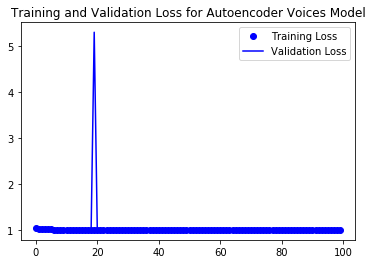

In [0]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(100)
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss for Autoencoder Voices Model')
plt.legend()
plt.show()

In [0]:
autoencoder.save_weights('Autoencoder_Voices_Weights.h5')

In [0]:
input_img = Input(shape = (64, 64, 3))
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(input_img)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
output = Dense(160, activation = 'softmax')(x)

In [0]:
full_model = Model(input_img, output)

In [0]:
len(full_model.layers)

29

In [0]:
for l1, l2 in zip(full_model.layers[:26], autoencoder.layers[0:26]):
  l1.set_weights(l2.get_weights())

In [0]:
autoencoder.get_weights()[0][1]

array([[[-1.37625905e-02, -1.29738748e-01,  7.77044967e-02,
         -6.62038326e-02, -5.62239945e-01, -2.45890003e-02,
          6.00689985e-02,  1.00667417e-01,  1.88464429e-02,
         -7.88812805e-03, -6.61211684e-02,  4.40740027e-02,
          1.13965467e-01,  1.01051904e-01,  8.39714557e-02,
         -7.28666484e-02, -8.41181353e-02, -2.63784137e-02,
         -1.15087749e-02, -5.76011650e-02, -9.83508304e-02,
         -1.10937975e-01, -1.26110181e-01, -5.52679263e-02,
          1.92155555e-01, -7.96650574e-02,  1.14065461e-01,
          1.06533334e-01,  7.49313161e-02,  4.25698468e-03,
          9.68482718e-02, -6.90288022e-02],
        [ 1.33893698e-01, -7.12839812e-02, -6.73973411e-02,
          1.82284102e-01, -2.89483786e-01, -1.28497571e-01,
          8.62966552e-02,  1.58490032e-01, -9.95955020e-02,
         -3.84759940e-02, -7.78776333e-02,  6.10330664e-02,
          1.26747698e-01, -2.52002999e-02, -7.39362016e-02,
         -1.43045885e-02,  1.27240404e-01,  1.32562712e-

In [0]:
full_model.get_weights()[0][1]

array([[[-1.37625905e-02, -1.29738748e-01,  7.77044967e-02,
         -6.62038326e-02, -5.62239945e-01, -2.45890003e-02,
          6.00689985e-02,  1.00667417e-01,  1.88464429e-02,
         -7.88812805e-03, -6.61211684e-02,  4.40740027e-02,
          1.13965467e-01,  1.01051904e-01,  8.39714557e-02,
         -7.28666484e-02, -8.41181353e-02, -2.63784137e-02,
         -1.15087749e-02, -5.76011650e-02, -9.83508304e-02,
         -1.10937975e-01, -1.26110181e-01, -5.52679263e-02,
          1.92155555e-01, -7.96650574e-02,  1.14065461e-01,
          1.06533334e-01,  7.49313161e-02,  4.25698468e-03,
          9.68482718e-02, -6.90288022e-02],
        [ 1.33893698e-01, -7.12839812e-02, -6.73973411e-02,
          1.82284102e-01, -2.89483786e-01, -1.28497571e-01,
          8.62966552e-02,  1.58490032e-01, -9.95955020e-02,
         -3.84759940e-02, -7.78776333e-02,  6.10330664e-02,
          1.26747698e-01, -2.52002999e-02, -7.39362016e-02,
         -1.43045885e-02,  1.27240404e-01,  1.32562712e-

In [0]:
for layer in full_model.layers[0:26]:
  layer.trainable = False

In [0]:
full_model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [0]:
full_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_21 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_22 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 64)        1849

In [0]:
filepath = 'pretrained_voice_best_weights.h5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
callbacks_list = [checkpoint]
pretrained_classifier_train = full_model.fit(X_train, y_train, epochs = 100, batch_size = 256, verbose = 1, callbacks = callbacks_list, validation_data = [X_val, y_val])

Train on 24000 samples, validate on 8000 samples
Epoch 1/100
24000/24000 [==============================] - 9s 357us/step - loss: 3.7740 - acc: 0.1778 - val_loss: 15.1648 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to pretrained_voice_best_weights.h5
Epoch 2/100
24000/24000 [==============================] - 7s 310us/step - loss: 1.7077 - acc: 0.5806 - val_loss: 15.9731 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/100
24000/24000 [==============================] - 7s 312us/step - loss: 1.1715 - acc: 0.7096 - val_loss: 16.0168 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/100
24000/24000 [==============================] - 7s 310us/step - loss: 0.9724 - acc: 0.7602 - val_loss: 16.0321 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/100
24000/24000 [==============================] - 7s 309us/step - loss: 0.8616 - acc: 0.7831 - val_loss: 16.055

In [0]:
full_model.save_weights('full_model_pretrained_voices_weights.h5')

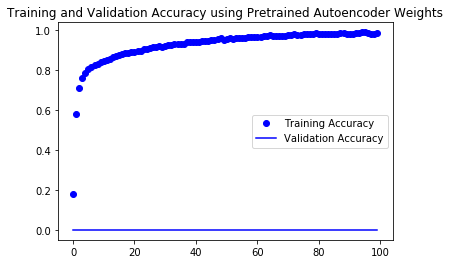

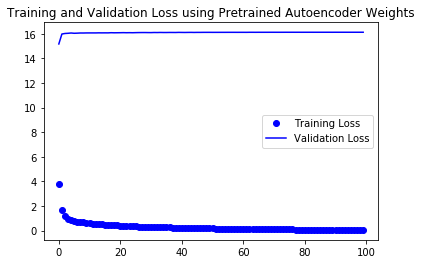

In [0]:
accuracy = pretrained_classifier_train.history['acc']
val_accuracy = pretrained_classifier_train.history['val_acc']
loss = pretrained_classifier_train.history['loss']
val_loss = pretrained_classifier_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy using Pretrained Autoencoder Weights')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss using Pretrained Autoencoder Weights')
plt.legend()
plt.show()

In [0]:
test_eval = full_model.evaluate(X_test, y_test, verbose = 0)

In [0]:
print('Test loss : ', test_eval[0])
print('Test accuracy : ', test_eval[1])

Test loss :  5.114871261536609
Test accuracy :  0.56575


In [0]:
predicted_classes = full_model.predict(X_test)

In [0]:
predicted_classes = np.argmax(np.round(predicted_classes), axis = 1)

In [0]:
test_df['predicted_classes'] = predicted_classes

In [0]:
test_df.head()

,test_labels,predicted_classes
0,89,159
1,89,159
2,89,159
3,89,51
4,89,159


In [0]:
test_df[test_df['test_labels'] != test_df['predicted_classes']]

,test_labels,predicted_classes
0,89,159
1,89,159
2,89,159
3,89,51
4,89,159
...,...,...
7995,1585,120
7996,1585,76
7997,1585,89
7998,1585,92


In [0]:
1-round(len(test_df[test_df['test_labels'] != test_df['predicted_classes']])/len(test_df),3)

0.0